In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from scipy import stats

# import cross validation and other evaluation tool 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# ??
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

# set display options
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300
%matplotlib inline
fig=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [1]:
data = pd.read_csv("Hotel_Bookings_Prepared.csv", index_col = "Unnamed: 0")
data

NameError: name 'pd' is not defined

In [33]:
len(data[data['is_canceled']==0])

115580

In [4]:
features = list(data.columns.values)
to_be_removed = ['is_canceled','arrival_date_year','arrival_date_week_number',
                 'arrival_date_day_of_month','country','reserved_room_type', 
                 'assigned_room_type','agent', 'company','reservation_status', 
                 'reservation_status_date','arrival_date_day_of_the_week','is_repeated_guest']
for feature in to_be_removed:
    features.remove(f"{feature}")

In [5]:
# define model features and label
X = data[features]
# change target column to array
y = data['is_canceled'].values.ravel()

In [6]:
# Split data - 30% for testing, 70% for training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
# define models to be logistic regression
lr= LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga',max_iter = 4000,n_jobs=-1)

In [23]:
# build model from trainging set
LRM = lr.fit(X_train,y_train)
# show coefficient of the features
coeff_LRM = pd.DataFrame(lr.coef_.flatten(), X.columns, columns=['Coefficient'])  
coeff_LRM

,Coefficient
lead_time,-2.627010
stays_in_weekend_nights,-6.172010
stays_in_week_nights,-7.528666
adults,-15.965272
children,-1.278255
babies,0.000000
previous_cancellations,4.277944
previous_bookings_not_canceled,59.033968
booking_changes,0.145690
days_in_waiting_list,-3.594609


In [25]:
# predict labels in testing set
# y_pred = predicted labels from testing set features (X_test)
y_pred = lr.predict(X_tesmait)

In [10]:
# y_pred_prob = the probabilistic predictions
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob

array([[0.99615122, 0.00384878],
       [0.98924623, 0.01075377],
       [0.99348773, 0.00651227],
       ...,
       [0.98978892, 0.01021108],
       [0.97520086, 0.02479914],
       [0.9935792 , 0.0064208 ]])

In [11]:
# set decision threshold 
# y_pred_prob_0 = predicted result under the threshold
y_pred_prob_0= [0 if i >= 0.70 else 1 for i in y_pred_prob[:,0]]

In [13]:
# Evaluation Tools
print("Accuracy: \n",accuracy_score(y_test,y_pred_prob_0,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,y_pred_prob_0))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_prob_0))

Accuracy: 
 0.9783622302258704
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     34674
           1       0.75      0.49      0.59      1143

    accuracy                           0.98     35817
   macro avg       0.87      0.74      0.79     35817
weighted avg       0.98      0.98      0.98     35817

Confusion Matrix: 
 [[34486   188]
 [  587   556]]


In [38]:
# calculate tpr and fpr based on different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob[:,1],pos_label=1)

In [39]:
# AUC
metrics.auc(fpr, tpr)

0.9339087163622919

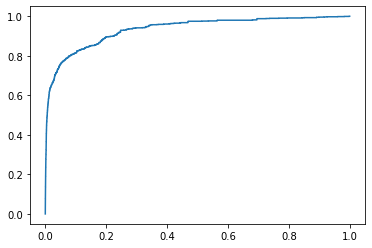

In [40]:
# ROC
plt.plot(fpr,tpr)